### **About**: The Notebook contains the pipeline for -

1.   Selecting the appropriate features
2.   Splitting the train and test data
3.   Encoding the features and storing it
4.   Saving the encoder
5.   PoC for the System architecture specified in the Paper




In [ ]:
import pandas as pd
import joblib

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 1.8 MB/s eta 0:00:00


In [ ]:
import math
import pandas as pd
import tensorflow as tf
import kerastuner.tuners as kt
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

<ipython-input-5-b22570058b68>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner.tuners as kt


In [ ]:
data_df = pd.read_csv('/content/drive/MyDrive/epro_project_data/clean_df.csv')

<ipython-input-6-792591f0253f>:1: DtypeWarning: Columns (20,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv('/content/drive/MyDrive/epro_project_data/clean_df.csv')


In [ ]:
data_df['index']

0        2
1        3
2        4
3        0
4        1
        ..
26791    2
26792    3
26793    4
26794    5
26795    1
Name: index, Length: 26796, dtype: int64

In [ ]:
data_df.status.unique()

array(['responded', 'delivered', 'seen', 'unopened'], dtype=object)

In [ ]:
data_df['probeTimestamp'] =  pd.to_datetime(data_df['probeTimestamp'])

In [ ]:
data_df['probeTimestamp'].max()

Timestamp('2023-05-24 09:10:00+0000', tz='UTC')

In [ ]:
data_df['is_weekend'] = ((pd.DatetimeIndex(data_df['probeTimestamp']).dayofweek) // 5 == 1).astype(int)

In [ ]:
data_df['created'] = pd.to_datetime(data_df['created'])

In [ ]:
data_df['participant_age'] = (data_df['probeTimestamp'] - data_df['created']).dt.days

In [ ]:
data_df

,_id,appVersion,engageTimestamp,probeTimestamp,researchParticipantId,responseTimestamp,reviewCount,status,submitTimestamp,surveyId,...,probe_day,probeTime_week,probeTime_year,notification_number,day_notification_number,Week_continue,cycle,class,is_weekend,participant_age
0,622382cae4c81200185f0d71,3.50,2022-03-05 15:32:05+00:00,2022-03-05 15:14:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 15:32:22+00:00,0.0,responded,2022-03-05 15:33:30+00:00,6217540ecac2480018cdd05b,...,5,9,2022,1,1,9,1,1,1,0
1,6223da17b976240018699a93,3.50,NaN,2022-03-05 17:55:00+00:00,621e31e76d80aa5e27a04935,NaN,NaN,delivered,NaN,6217540ecac2480018cdd05b,...,5,9,2022,2,2,9,1,0,1,0
2,6223da17b976240018699a80,3.50,2022-03-05 21:43:59+00:00,2022-03-05 20:50:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 21:44:12+00:00,0.0,responded,2022-03-05 21:45:59+00:00,6217540ecac2480018cdd05b,...,5,9,2022,3,3,9,1,1,1,0
3,622479b2e4c81200185f14d6,3.50,2022-03-06 09:04:35+00:00,2022-03-06 09:01:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 09:04:39+00:00,0.0,responded,2022-03-06 09:06:57+00:00,6217540ecac2480018cdd05b,...,6,9,2022,4,1,10,2,1,1,0
4,6224ab092e1724001820a3f5,3.50,2022-03-06 12:36:38+00:00,2022-03-06 12:04:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 12:36:45+00:00,0.0,responded,2022-03-06 12:37:29+00:00,6217540ecac2480018cdd05b,...,6,9,2022,5,2,10,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26791,646cca38c3a22000166722e4,3.80,NaN,2023-05-23 11:55:00+00:00,63da66a2f50dcfecb0751570,NaN,NaN,delivered,NaN,6282b681b4c68b0018c0a158,...,23,21,2023,61,2,73,4,0,0,110
26792,646ce1835d59aa001699d946,3.18,2023-05-23 15:53:15.437000+00:00,2023-05-23 14:54:00+00:00,63da66a2f50dcfecb0751573,2023-05-23 15:53:23.279000+00:00,0.0,responded,2023-05-23 15:53:39.620000+00:00,6282b681b4c68b0018c0a158,...,23,21,2023,41,1,73,3,1,0,111
26793,646cfcce5d59aa001699d9bf,3.18,2023-05-23 17:48:01.714000+00:00,2023-05-23 17:47:00+00:00,63da66a2f50dcfecb0751573,2023-05-23 17:48:06.449000+00:00,0.0,responded,2023-05-23 17:50:06.070000+00:00,6282b681b4c68b0018c0a158,...,23,21,2023,42,2,73,3,1,0,111
26794,646d27040a1a7e0016defa45,3.18,2023-05-23 20:49:13.556000+00:00,2023-05-23 20:48:00+00:00,63da66a2f50dcfecb0751573,2023-05-23 20:49:16.473000+00:00,0.0,responded,2023-05-23 20:50:12.053000+00:00,6282b681b4c68b0018c0a158,...,23,21,2023,43,3,73,3,1,0,111


In [ ]:
data_df.columns

Index(['_id', 'appVersion', 'engageTimestamp', 'probeTimestamp',
       'researchParticipantId', 'responseTimestamp', 'reviewCount', 'status',
       'submitTimestamp', 'surveyId', 'timeBasedNotificationId',
       'timeBasedSurveyQuestionId', 'created', 'downloadTimestamp',
       'mobileModelName', 'mobileOperatingSystemVersion', 'descriptionText',
       'endTime', 'index', 'initialiseNotifications', 'isFitbitSyncRequired',
       'isInitialised', 'isQPROSurvey', 'isRelativeTiming', 'isSetImmediately',
       'labelColor', 'maxNumberOfProbes', 'responseTimeLimitInMins',
       'startTime', 'timeBasedValidation', 'timeGapInMins', 'title', 'type',
       'validation', 'variance', 'install_created', 'deviceType', 'modified',
       'surveyIds', 'timeZone', 'HowLongToEngage', 'HowLongToSubmit',
       'submit_weekday', 'submitHour', 'probeTime_date', 'probeHour',
       'probe_weekday', 'probe_day', 'probeTime_week', 'probeTime_year',
       'notification_number', 'day_notification_numb

In [ ]:
data_df['mobileModelName'].isna().sum()

971

In [ ]:
data_df.head()

,_id,appVersion,engageTimestamp,probeTimestamp,researchParticipantId,responseTimestamp,reviewCount,status,submitTimestamp,surveyId,...,probe_weekday,probe_day,probeTime_week,probeTime_year,notification_number,day_notification_number,Week_continue,cycle,class,is_weekend
0,622382cae4c81200185f0d71,3.5,2022-03-05 15:32:05+00:00,2022-03-05 15:14:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 15:32:22+00:00,0.0,responded,2022-03-05 15:33:30+00:00,6217540ecac2480018cdd05b,...,5,5,9,2022,1,1,9,1,1,1
1,6223da17b976240018699a93,3.5,NaN,2022-03-05 17:55:00+00:00,621e31e76d80aa5e27a04935,NaN,NaN,delivered,NaN,6217540ecac2480018cdd05b,...,5,5,9,2022,2,2,9,1,0,1
2,6223da17b976240018699a80,3.5,2022-03-05 21:43:59+00:00,2022-03-05 20:50:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 21:44:12+00:00,0.0,responded,2022-03-05 21:45:59+00:00,6217540ecac2480018cdd05b,...,5,5,9,2022,3,3,9,1,1,1
3,622479b2e4c81200185f14d6,3.5,2022-03-06 09:04:35+00:00,2022-03-06 09:01:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 09:04:39+00:00,0.0,responded,2022-03-06 09:06:57+00:00,6217540ecac2480018cdd05b,...,6,6,9,2022,4,1,10,2,1,1
4,6224ab092e1724001820a3f5,3.5,2022-03-06 12:36:38+00:00,2022-03-06 12:04:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 12:36:45+00:00,0.0,responded,2022-03-06 12:37:29+00:00,6217540ecac2480018cdd05b,...,6,6,9,2022,5,2,10,2,1,1


In [ ]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
appVersion,26796.0,3.446198,0.304853,3.1,3.16,3.18,3.8,3.9
reviewCount,18508.0,0.005673,0.085219,0.0,0.00,0.00,0.0,3.0
descriptionText,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
index,26796.0,2.992648,1.415131,0.0,2.00,3.00,4.0,5.0
isSetImmediately,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maxNumberOfProbes,26796.0,7.987685,0.110291,7.0,8.00,8.00,8.0,8.0
responseTimeLimitInMins,26796.0,75.000000,0.000000,75.0,75.00,75.00,75.0,75.0
timeGapInMins,26796.0,1440.000000,0.000000,1440.0,1440.00,1440.00,1440.0,1440.0
variance,26796.0,15.000000,0.000000,15.0,15.00,15.00,15.0,15.0
HowLongToEngage,18508.0,1046.631835,1578.410024,1.0,91.00,535.50,1618.0,86153.0


Experiment 1 Features - Commented out

In [ ]:
features=[ 'appVersion', 'surveyId', 'timeBasedNotificationId',
       'timeBasedSurveyQuestionId',
       'mobileModelName', 'mobileOperatingSystemVersion', 'title', 'deviceType', 'probeHour',
       'probe_weekday', 'probe_day', 'probeTime_week', 'probeTime_year',
       'notification_number', 'day_notification_number', 'Week_continue',
       'cycle', 'is_weekend','participant_age']

In [ ]:
# features=[ 'appVersion', 'surveyId', 'timeBasedNotificationId',
#        'timeBasedSurveyQuestionId',  'probe_day', 'probe_weekday', 'probeHour', 'maxNumberOfProbes',
#         'timeGapInMins', 'title', 'deviceType', 'notification_number',
#        'probeTime_week', 'cycle', 'probeTime_year', 'Week_continue', 'day_notification_number']

Experiment 2 Features - Currently used in Model Building

In [ ]:
features=[ 'appVersion', 'surveyId', 'timeBasedNotificationId',  'probe_day', 'probe_weekday', 'probeHour',  'title', 'deviceType', 'notification_number',
       'probeTime_week', 'cycle', 'probeTime_year', 'Week_continue', 'day_notification_number','is_weekend']

In [ ]:
data_df['day_of_week'] = data_df['probeTimestamp'].dt.dayofweek
data_df['day_of_month'] = data_df['probeTimestamp'].dt.day
data_df['probeHour']= data_df['probeTimestamp'].dt.hour

In [ ]:
data_df[features]

,appVersion,surveyId,timeBasedNotificationId,timeBasedSurveyQuestionId,mobileModelName,mobileOperatingSystemVersion,title,deviceType,probeHour,probe_weekday,probe_day,probeTime_week,probeTime_year,notification_number,day_notification_number,Week_continue,cycle,is_weekend,participant_age
0,3.50,6217540ecac2480018cdd05b,6217540ecac2480018cdd05e,6217540ecac2480018cdd0a1,Samsung SM-G780G,31,Late Afternoon,NaN,15,5,5,9,2022,1,1,9,1,1,0
1,3.50,6217540ecac2480018cdd05b,6217540ecac2480018cdd05f,6217540ecac2480018cdd0bd,Samsung SM-G780G,31,Evening,NaN,17,5,5,9,2022,2,2,9,1,1,0
2,3.50,6217540ecac2480018cdd05b,6217540ecac2480018cdd060,6217540ecac2480018cdd13b,Samsung SM-G780G,31,Bedtime,NaN,20,5,5,9,2022,3,3,9,1,1,0
3,3.50,6217540ecac2480018cdd05b,6217540ecac2480018cdd05c,6217540ecac2480018cdd06b,Samsung SM-G780G,31,Morning,NaN,9,6,6,9,2022,4,1,10,2,1,0
4,3.50,6217540ecac2480018cdd05b,6217540ecac2480018cdd05d,6217540ecac2480018cdd08a,Samsung SM-G780G,31,Early Afternoon,NaN,12,6,6,9,2022,5,2,10,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26791,3.80,6282b681b4c68b0018c0a158,6282b681b4c68b0018c0a15a,6282b681b4c68b0018c0a1cb,Samsung SM-A127F,33,Early Afternoon,NaN,11,1,23,21,2023,61,2,73,4,0,110
26792,3.18,6282b681b4c68b0018c0a158,6282b681b4c68b0018c0a15b,6282b681b4c68b0018c0a1c6,"iPhone14,3",16.3.1,Late Afternoon,ios,14,1,23,21,2023,41,1,73,3,0,111
26793,3.18,6282b681b4c68b0018c0a158,6282b681b4c68b0018c0a15c,6282b681b4c68b0018c0a17f,"iPhone14,3",16.3.1,Evening,ios,17,1,23,21,2023,42,2,73,3,0,111
26794,3.18,6282b681b4c68b0018c0a158,6282b681b4c68b0018c0a15d,6282b681b4c68b0018c0a1a2,"iPhone14,3",16.3.1,Bedtime,ios,20,1,23,21,2023,43,3,73,3,0,111


In [ ]:
data_df.isna().sum()

_id                                 0
appVersion                          0
engageTimestamp                  8288
probeTimestamp                      0
researchParticipantId               0
responseTimestamp                8288
reviewCount                      8288
status                              0
submitTimestamp                  8288
surveyId                            0
timeBasedNotificationId             0
timeBasedSurveyQuestionId           0
created                             0
downloadTimestamp                 971
mobileModelName                   971
mobileOperatingSystemVersion      971
descriptionText                 26796
endTime                             0
index                               0
initialiseNotifications             0
isFitbitSyncRequired            26778
isInitialised                       0
isQPROSurvey                    26778
isRelativeTiming                    0
isSetImmediately                26796
labelColor                          0
maxNumberOfP

In [ ]:
clean_df= data_df[[ 'appVersion', 'researchParticipantId','timeBasedNotificationId',
       'timeBasedSurveyQuestionId',  'probeTime_week', 'probeHour', 'title', 'deviceType', 'notification_number', 'cycle', 'Week_continue', 'day_notification_number','class']]

In [ ]:
clean_df= data_df[[ 'appVersion', 'surveyId', 'timeBasedNotificationId',
       'timeBasedSurveyQuestionId',
       'mobileModelName', 'mobileOperatingSystemVersion', 'title', 'deviceType', 'probeHour',
       'probe_weekday', 'probe_day', 'probeTime_week', 'probeTime_year',
       'notification_number', 'day_notification_number', 'Week_continue',
       'cycle', 'is_weekend','participant_age','researchParticipantId','class']]

In [ ]:
clean_df

,appVersion,surveyId,timeBasedNotificationId,timeBasedSurveyQuestionId,mobileModelName,mobileOperatingSystemVersion,title,deviceType,probeHour,probe_weekday,...,probeTime_week,probeTime_year,notification_number,day_notification_number,Week_continue,cycle,is_weekend,participant_age,researchParticipantId,class
0,3.50,6217540ecac2480018cdd05b,6217540ecac2480018cdd05e,6217540ecac2480018cdd0a1,Samsung SM-G780G,31,Late Afternoon,NaN,15,5,...,9,2022,1,1,9,1,1,0,621e31e76d80aa5e27a04935,1
1,3.50,6217540ecac2480018cdd05b,6217540ecac2480018cdd05f,6217540ecac2480018cdd0bd,Samsung SM-G780G,31,Evening,NaN,17,5,...,9,2022,2,2,9,1,1,0,621e31e76d80aa5e27a04935,0
2,3.50,6217540ecac2480018cdd05b,6217540ecac2480018cdd060,6217540ecac2480018cdd13b,Samsung SM-G780G,31,Bedtime,NaN,20,5,...,9,2022,3,3,9,1,1,0,621e31e76d80aa5e27a04935,1
3,3.50,6217540ecac2480018cdd05b,6217540ecac2480018cdd05c,6217540ecac2480018cdd06b,Samsung SM-G780G,31,Morning,NaN,9,6,...,9,2022,4,1,10,2,1,0,621e31e76d80aa5e27a04935,1
4,3.50,6217540ecac2480018cdd05b,6217540ecac2480018cdd05d,6217540ecac2480018cdd08a,Samsung SM-G780G,31,Early Afternoon,NaN,12,6,...,9,2022,5,2,10,2,1,0,621e31e76d80aa5e27a04935,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26791,3.80,6282b681b4c68b0018c0a158,6282b681b4c68b0018c0a15a,6282b681b4c68b0018c0a1cb,Samsung SM-A127F,33,Early Afternoon,NaN,11,1,...,21,2023,61,2,73,4,0,110,63da66a2f50dcfecb0751570,0
26792,3.18,6282b681b4c68b0018c0a158,6282b681b4c68b0018c0a15b,6282b681b4c68b0018c0a1c6,"iPhone14,3",16.3.1,Late Afternoon,ios,14,1,...,21,2023,41,1,73,3,0,111,63da66a2f50dcfecb0751573,1
26793,3.18,6282b681b4c68b0018c0a158,6282b681b4c68b0018c0a15c,6282b681b4c68b0018c0a17f,"iPhone14,3",16.3.1,Evening,ios,17,1,...,21,2023,42,2,73,3,0,111,63da66a2f50dcfecb0751573,1
26794,3.18,6282b681b4c68b0018c0a158,6282b681b4c68b0018c0a15d,6282b681b4c68b0018c0a1a2,"iPhone14,3",16.3.1,Bedtime,ios,20,1,...,21,2023,43,3,73,3,0,111,63da66a2f50dcfecb0751573,1


In [ ]:
clean_df.columns

Index(['appVersion', 'surveyId', 'timeBasedNotificationId',
       'timeBasedSurveyQuestionId', 'mobileModelName',
       'mobileOperatingSystemVersion', 'title', 'deviceType', 'probeHour',
       'probe_weekday', 'probe_day', 'probeTime_week', 'probeTime_year',
       'notification_number', 'day_notification_number', 'Week_continue',
       'cycle', 'is_weekend', 'participant_age', 'researchParticipantId',
       'class'],
      dtype='object')

In [ ]:
clean_df.researchParticipantId.nunique()

357

In [ ]:
grouped_participants = clean_df.groupby('researchParticipantId')

# Create a dictionary to store DataFrames for each participant
participant_dfs = {}

# Iterate through each group and store DataFrames in the dictionary
for participant_id, participant_group in grouped_participants:
    participant_dfs[participant_id] = participant_group

In [ ]:
len(participant_dfs)

357

In [ ]:
participant_train_data_dfs = {}
participant_test_data_dfs = {}

skipped_participants = []

In [ ]:
# Iterate through each group and split data for each participant
for participant_id, participant_group in grouped_participants:
    if len(participant_group) < 10:
        skipped_participants.append(participant_id)
        continue

    if len(participant_group) > 10:
    # Split data for each participant using train_test_split
      train_df, test_df = train_test_split(participant_group, test_size=0.2, random_state=42)

      # Store DataFrames in the dictionaries
      participant_train_data_dfs[participant_id] = train_df
      participant_test_data_dfs[participant_id] = test_df

In [ ]:
skipped_participants

['6217540ecac2480018cdd182',
 '6229c07c75135e0018a5cf96',
 '6242cb092bf2700018241caa',
 '6282b681b4c68b0018c0a270',
 '6282b681b4c68b0018c0a2f8',
 '6282b682b4c68b0018c0a32d',
 '63da66a2f50dcfecb07515aa']

In [ ]:
 len(participant_train_data_dfs)

349

In [ ]:
participant_train_data_dfs['6282b681b4c68b0018c0a1f3'].dtypes

appVersion                      float64
surveyId                         object
timeBasedNotificationId          object
timeBasedSurveyQuestionId        object
mobileModelName                  object
mobileOperatingSystemVersion     object
title                            object
deviceType                       object
probeHour                         int64
probe_weekday                     int64
probe_day                         int64
probeTime_week                    int64
probeTime_year                    int64
notification_number               int64
day_notification_number           int64
Week_continue                     int64
cycle                             int64
is_weekend                        int64
participant_age                   int64
researchParticipantId            object
class                             int64
dtype: object

In [ ]:
object_columns = participant_train_data_dfs['6282b681b4c68b0018c0a1f3'].select_dtypes(include=['object'])

# List the column names with object dtype
object_column_names = object_columns.columns.tolist()

In [ ]:
object_column_names

['surveyId',
 'timeBasedNotificationId',
 'timeBasedSurveyQuestionId',
 'mobileModelName',
 'mobileOperatingSystemVersion',
 'title',
 'deviceType',
 'researchParticipantId']

In [ ]:
client_directory = '/content/drive/MyDrive/epro_project_data/client/raw_data/'

In [ ]:
# Save each participant's training data as a separate CSV
for participant_id, train_df in participant_train_data_dfs.items():
    file_name = f'{client_directory}/participant_{participant_id}_train_data.csv'
    train_df.to_csv(file_name, index=False)

In [ ]:
server_directory = '/content/drive/MyDrive/epro_project_data/server/raw_data/'

In [ ]:
# Save each participant's training data as a separate CSV
for participant_id, test_df in participant_test_data_dfs.items():
    file_name = f'{server_directory}participant_{participant_id}_test_data.csv'
    test_df.to_csv(file_name, index=False)

## Read all the CSV files from the client and save the preprocessed data

In [ ]:
import os
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Step 1: Define the directory path
client_directory = '/content/drive/MyDrive/epro_project_data/client/raw_data/'
scaler_directory = '/content/drive/MyDrive/epro_project_data/client/scalers'
label_encoder_directory = '/content/drive/MyDrive/epro_project_data/client/label_encoders'

# Step 2: Initialize an empty list to store the processed DataFrames
processed_dfs = []

# Step 3: Get a list of CSV files in the directory
csv_files = [file for file in os.listdir(client_directory) if file.endswith('.csv')]

# Step 4: Loop through each CSV file and process the data
for file in csv_files:
    file_path = os.path.join(client_directory, file)
    df = pd.read_csv(file_path)

    # Step 5: Apply LabelEncoder to the specified categorical columns
    # Replace 'categorical_column1', 'categorical_column2', ... with the actual column names
    categorical_columns = ['surveyId',
      'timeBasedNotificationId',
      'timeBasedSurveyQuestionId',
       'mobileModelName',
        'mobileOperatingSystemVersion',
        'title',
        'deviceType']
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col])

    # Step 6: Apply MinMaxScaler on the specified columns only
    minmax_scaler = MinMaxScaler()
    columns_to_scale = df.drop(columns=['researchParticipantId', 'class']).columns
    df[columns_to_scale] = minmax_scaler.fit_transform(df[columns_to_scale])

    # Step 7: Append the processed DataFrame to the list
    processed_dfs.append(df)

    participant_id = file.split('_')[1]

    # Step 8: Save the scaler for the current participant ID
    scaler_filename = os.path.join(scaler_directory, f'{participant_id}_scaler.pkl')
    joblib.dump(minmax_scaler, scaler_filename)

    # Step 9: Save the label encoder for the current participant ID
    label_encoder_filename = os.path.join(label_encoder_directory, f'{participant_id}_label_encoder.pkl')
    joblib.dump(label_encoder, label_encoder_filename)

# The 'processed_dfs' list now contains the processed DataFrames with LabelEncoder applied to the specified categorical columns and MinMaxScaler applied to the specified columns from each CSV file.


In [ ]:
processed_dfs[0]

,appVersion,surveyId,timeBasedNotificationId,timeBasedSurveyQuestionId,mobileModelName,mobileOperatingSystemVersion,title,deviceType,probeHour,probe_weekday,...,probeTime_week,probeTime_year,notification_number,day_notification_number,Week_continue,cycle,is_weekend,participant_age,researchParticipantId,class
0,0.0,0.0,0.75,0.5625,0.0,0.0,0.50,0.0,0.750000,0.500000,...,1.0,0.0,0.60,0.25,0.0,0.0,0.0,0.666667,621e31e76d80aa5e27a0492b,1
1,0.0,0.0,1.00,0.8750,0.0,0.0,0.00,0.0,1.000000,0.500000,...,1.0,0.0,0.64,0.50,0.0,0.0,0.0,0.666667,621e31e76d80aa5e27a0492b,1
2,0.0,0.0,0.50,0.5000,0.0,0.0,0.75,0.0,0.500000,0.333333,...,1.0,0.0,0.44,0.25,0.0,0.0,0.0,0.500000,621e31e76d80aa5e27a0492b,1
3,0.0,0.0,0.75,0.6875,0.0,0.0,0.50,0.0,0.666667,0.833333,...,1.0,0.0,0.92,0.75,0.0,0.0,1.0,1.000000,621e31e76d80aa5e27a0492b,1
4,0.0,0.0,0.50,0.3750,0.0,0.0,0.75,0.0,0.500000,1.000000,...,0.0,0.0,0.00,0.25,0.0,0.0,1.0,0.000000,621e31e76d80aa5e27a0492b,1
5,0.0,0.0,0.00,0.0000,0.0,0.0,1.00,0.0,0.000000,0.000000,...,1.0,0.0,0.12,0.00,0.0,0.0,0.0,0.000000,621e31e76d80aa5e27a0492b,1
6,0.0,0.0,0.25,0.1875,0.0,0.0,0.25,0.0,0.250000,0.000000,...,1.0,0.0,0.16,0.25,0.0,0.0,0.0,0.166667,621e31e76d80aa5e27a0492b,1
7,0.0,0.0,0.75,0.6250,0.0,0.0,0.50,0.0,0.750000,1.000000,...,0.0,0.0,0.04,0.50,0.0,0.0,1.0,0.000000,621e31e76d80aa5e27a0492b,1
8,0.0,0.0,0.00,0.0000,0.0,0.0,1.00,0.0,0.000000,0.500000,...,1.0,0.0,0.56,0.00,0.0,0.0,0.0,0.500000,621e31e76d80aa5e27a0492b,1
9,0.0,0.0,0.25,0.2500,0.0,0.0,0.25,0.0,0.250000,0.833333,...,1.0,0.0,0.84,0.25,0.0,0.0,1.0,1.000000,621e31e76d80aa5e27a0492b,1


In [ ]:
# Save each participant's preprocessed training data as a separate CSV
client_directory='/content/drive/MyDrive/epro_project_data/client/preprocessed_data'
for df in processed_dfs:
    participant_id=df['researchParticipantId'][0]
    file_name = f'{client_directory}/participant_{participant_id}_train_preprocessed_data.csv'
    df.to_csv(file_name, index=False)

## **Approach 1:** Fit Autoencoders to each participant Seperately and Store the results



The approch did not work well since we have very little data per participant to fit an autoencoder per participant

In [ ]:
# import os
# import pandas as pd
# import tensorflow as tf
# from keras.layers.core import Dense
# from tensorflow.keras import Sequential, Model, optimizers
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.utils import resample

# # Step 1: Define the directory paths
# client_directory = '/content/drive/MyDrive/epro_project_data/client/raw_data/'
# scaler_directory = '/content/drive/MyDrive/epro_project_data/client/scalers'
# autoencoder_directory = '/content/drive/MyDrive/epro_project_data/client/autoencoders'

# # Step 2: Initialize an empty list to store the processed DataFrames
# processed_dfs = []
# reduced_feature_dfs = []  # List to store reduced_feature_df for each participant

# # Step 3: Get a list of CSV files in the directory
# csv_files = [file for file in os.listdir(client_directory) if file.endswith('.csv')]

# # Step 4: Loop through each CSV file and process the data
# for file in csv_files:
#     file_path = os.path.join(client_directory, file)
#     df = pd.read_csv(file_path)

#     # Step 5: Apply one-hot encoding to the specified categorical columns
#     # Replace 'categorical_column1', 'categorical_column2', ... with the actual column names
#     categorical_columns = ['timeBasedNotificationId','timeBasedSurveyQuestionId',, 'title', 'deviceType']
#     df_encoded = pd.get_dummies(df, columns=categorical_columns)

#     scaler = MinMaxScaler()
#     columns_to_drop=['researchParticipantId', 'class']
#     df_to_scale = df_encoded.drop(columns=columns_to_drop)
#     oversampled_df = resample(df_to_scale, n_samples=len(df_to_scale)*10, replace=True, random_state=42)


#     # Step 6: Initialize the autoencoder architecture for feature reduction
#     autoencoder = Sequential(
#         [
#             Dense(32, activation="relu", input_shape=(oversampled_df.shape[1],)),
#             Dense(16, activation="relu"),
#             #Dense(8, activation="relu"),
#             Dense(16, activation="relu"),  # Additional hidden layer in the decoder
#             Dense(len(oversampled_df.columns), activation="sigmoid")  # Output nodes match the number of columns in df_encoded
#         ],
#         name="autoencoder"
#     )

#     # Step 7: Compile the autoencoder model
#     optimizer = optimizers.Adam(learning_rate=0.001)
#     autoencoder.compile(
#         loss='mae',
#         metrics=['mae'],
#         optimizer='adam'
#     )

#     # Step 8: Fit the autoencoder on the data
#     autoencoder.fit(
#         oversampled_df,
#         oversampled_df,
#         epochs=100,
#         batch_size=1
#     )

#     # Step 9: Create a separate encoder model using the layers of the autoencoder
#     encoder_layers = autoencoder.layers[:3]  # Extract the first three layers (input to first Dense(4) layer)
#     encoder = Sequential(encoder_layers, name="encoder")

#     # Step 10: Encode the data to get the reduced feature representation
#     reduced_features = encoder.predict(oversampled_df)

#     # Step 11: Convert the reduced features back to a DataFrame
#     reduced_features_df = pd.DataFrame(reduced_features, columns=[f'feature_{i+1}' for i in range(16)])

#     # Step 12: Add back the dropped columns to the reduced features DataFrame
#     for column in columns_to_drop:
#         reduced_features_df[column] = df_encoded[column]

#     # Step 13: Append the processed DataFrame to the list
#     processed_dfs.append(df_encoded)
#     reduced_feature_dfs.append(reduced_features_df)

#     participant_id = file.split('_')[1]

#     # Step 14: Save the scaler for the current participant ID
#     scaler_filename = os.path.join(scaler_directory, f'{participant_id}_scaler.pkl')
#     joblib.dump(scaler, scaler_filename)

#     # Step 15: Save the autoencoder model for the current participant ID
#     autoencoder_filename = os.path.join(autoencoder_directory, f'{participant_id}_autoencoder.h5')
#     autoencoder.save(autoencoder_filename)

# # The 'processed_dfs' list now contains the processed DataFrames with one-hot encoding applied to the specified categorical columns
# # and the 'reduced_feature_dfs' list contains the DataFrames with reduced features for each participant.



Epoch 1/100
210/210 [==============================] - 1s 2ms/step - loss: 88.3030 - mae: 88.3030
Epoch 2/100
210/210 [==============================] - 0s 2ms/step - loss: 88.2978 - mae: 88.2978
Epoch 3/100
210/210 [==============================] - 0s 2ms/step - loss: 88.2978 - mae: 88.2978
Epoch 4/100
210/210 [==============================] - 0s 2ms/step - loss: 88.2978 - mae: 88.2978
Epoch 5/100
210/210 [==============================] - 0s 2ms/step - loss: 88.2978 - mae: 88.2978
Epoch 6/100
210/210 [==============================] - 0s 2ms/step - loss: 88.2978 - mae: 88.2978
Epoch 7/100
210/210 [==============================] - 0s 2ms/step - loss: 88.2978 - mae: 88.2978
Epoch 8/100
210/210 [==============================] - 0s 2ms/step - loss: 88.2978 - mae: 88.2978
Epoch 9/100
210/210 [==============================] - 0s 2ms/step - loss: 88.2978 - mae: 88.2978
Epoch 10/100
210/210 [==============================] - 0s 2ms/step - loss: 88.2977 - mae: 88.2977
Epoch 11/100
210/21

KeyboardInterrupt: ignored

In [ ]:
import math
import pandas as pd
import tensorflow as tf
import kerastuner.tuners as kt
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.preprocessing import MinMaxScaler
from keras.utils.vis_utils import plot_model

## **Approach 2**: Training one Single Autoencoder on the comobined data of all the participant

In [ ]:
client_directory = '/content/drive/MyDrive/epro_project_data/client/preprocessed_data/'
processed_dfs = []
csv_files = [file for file in os.listdir(client_directory) if file.endswith('.csv')]
for file in csv_files:
     file_path = os.path.join(client_directory, file)
     df = pd.read_csv(file_path)
     processed_dfs.append(df)

In [ ]:
processed_dfs[0]

,appVersion,surveyId,timeBasedNotificationId,timeBasedSurveyQuestionId,mobileModelName,mobileOperatingSystemVersion,title,deviceType,probeHour,probe_weekday,...,probeTime_week,probeTime_year,notification_number,day_notification_number,Week_continue,cycle,is_weekend,participant_age,researchParticipantId,class
0,0.0,0.0,0.75,0.5625,0.0,0.0,0.50,0.0,0.750000,0.500000,...,1.0,0.0,0.60,0.25,0.0,0.0,0.0,0.666667,621e31e76d80aa5e27a0492b,1
1,0.0,0.0,1.00,0.8750,0.0,0.0,0.00,0.0,1.000000,0.500000,...,1.0,0.0,0.64,0.50,0.0,0.0,0.0,0.666667,621e31e76d80aa5e27a0492b,1
2,0.0,0.0,0.50,0.5000,0.0,0.0,0.75,0.0,0.500000,0.333333,...,1.0,0.0,0.44,0.25,0.0,0.0,0.0,0.500000,621e31e76d80aa5e27a0492b,1
3,0.0,0.0,0.75,0.6875,0.0,0.0,0.50,0.0,0.666667,0.833333,...,1.0,0.0,0.92,0.75,0.0,0.0,1.0,1.000000,621e31e76d80aa5e27a0492b,1
4,0.0,0.0,0.50,0.3750,0.0,0.0,0.75,0.0,0.500000,1.000000,...,0.0,0.0,0.00,0.25,0.0,0.0,1.0,0.000000,621e31e76d80aa5e27a0492b,1
5,0.0,0.0,0.00,0.0000,0.0,0.0,1.00,0.0,0.000000,0.000000,...,1.0,0.0,0.12,0.00,0.0,0.0,0.0,0.000000,621e31e76d80aa5e27a0492b,1
6,0.0,0.0,0.25,0.1875,0.0,0.0,0.25,0.0,0.250000,0.000000,...,1.0,0.0,0.16,0.25,0.0,0.0,0.0,0.166667,621e31e76d80aa5e27a0492b,1
7,0.0,0.0,0.75,0.6250,0.0,0.0,0.50,0.0,0.750000,1.000000,...,0.0,0.0,0.04,0.50,0.0,0.0,1.0,0.000000,621e31e76d80aa5e27a0492b,1
8,0.0,0.0,0.00,0.0000,0.0,0.0,1.00,0.0,0.000000,0.500000,...,1.0,0.0,0.56,0.00,0.0,0.0,0.0,0.500000,621e31e76d80aa5e27a0492b,1
9,0.0,0.0,0.25,0.2500,0.0,0.0,0.25,0.0,0.250000,0.833333,...,1.0,0.0,0.84,0.25,0.0,0.0,1.0,1.000000,621e31e76d80aa5e27a0492b,1


In [ ]:
processed_dfs[0].shape

(21, 21)

In [ ]:
merged_processed_df=pd.concat(processed_dfs, axis=0)

In [ ]:
merged_processed_df

,appVersion,surveyId,timeBasedNotificationId,timeBasedSurveyQuestionId,mobileModelName,mobileOperatingSystemVersion,title,deviceType,probeHour,probe_weekday,...,probeTime_week,probeTime_year,notification_number,day_notification_number,Week_continue,cycle,is_weekend,participant_age,researchParticipantId,class
0,0.0,0.0,0.75,0.562500,0.0,0.0,0.50,0.0,0.750000,0.500000,...,1.0,0.0,0.600000,0.25,0.0,0.0,0.0,0.666667,621e31e76d80aa5e27a0492b,1
1,0.0,0.0,1.00,0.875000,0.0,0.0,0.00,0.0,1.000000,0.500000,...,1.0,0.0,0.640000,0.50,0.0,0.0,0.0,0.666667,621e31e76d80aa5e27a0492b,1
2,0.0,0.0,0.50,0.500000,0.0,0.0,0.75,0.0,0.500000,0.333333,...,1.0,0.0,0.440000,0.25,0.0,0.0,0.0,0.500000,621e31e76d80aa5e27a0492b,1
3,0.0,0.0,0.75,0.687500,0.0,0.0,0.50,0.0,0.666667,0.833333,...,1.0,0.0,0.920000,0.75,0.0,0.0,1.0,1.000000,621e31e76d80aa5e27a0492b,1
4,0.0,0.0,0.50,0.375000,0.0,0.0,0.75,0.0,0.500000,1.000000,...,0.0,0.0,0.000000,0.25,0.0,0.0,1.0,0.000000,621e31e76d80aa5e27a0492b,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,0.0,0.0,0.00,0.192308,0.0,0.0,1.00,0.0,0.076923,0.000000,...,1.0,0.0,0.512821,0.00,1.0,1.0,0.0,0.500000,644925c981730c59df9b4a95,1
28,0.0,0.0,0.50,0.769231,0.0,0.0,0.75,0.0,0.461538,0.666667,...,0.0,0.0,0.179487,0.50,0.0,0.0,0.0,0.250000,644925c981730c59df9b4a95,1
29,0.0,0.0,1.00,0.500000,0.0,0.0,0.00,0.0,0.923077,0.833333,...,0.0,0.0,0.358974,1.00,0.0,0.0,1.0,0.375000,644925c981730c59df9b4a95,1
30,0.0,0.0,0.75,0.346154,0.0,0.0,0.50,0.0,0.769231,0.166667,...,1.0,0.0,0.717949,0.75,1.0,1.0,0.0,0.750000,644925c981730c59df9b4a95,1


In [ ]:
merged_processed_df.shape

(21329, 21)

In [ ]:
merged_processed_df.columns

Index(['appVersion', 'surveyId', 'timeBasedNotificationId',
       'timeBasedSurveyQuestionId', 'mobileModelName',
       'mobileOperatingSystemVersion', 'title', 'deviceType', 'probeHour',
       'probe_weekday', 'probe_day', 'probeTime_week', 'probeTime_year',
       'notification_number', 'day_notification_number', 'Week_continue',
       'cycle', 'is_weekend', 'participant_age', 'researchParticipantId',
       'class'],
      dtype='object')

In [ ]:
X = merged_processed_df.drop(columns=['class', 'researchParticipantId'])
y = merged_processed_df['class']

# Split the data into separate classes
class_0 = merged_processed_df[merged_processed_df['class'] == 0]
class_1 = merged_processed_df[merged_processed_df['class'] == 1]

# Resample the smaller class to have the same number of samples as the larger class
class_0_resampled = resample(class_0, replace=True, n_samples=len(class_1), random_state=42)

# Concatenate the resampled class 0 with class 1 to create a balanced DataFrame
balanced_df = pd.concat([class_0_resampled, class_1])

# Separate the features (X_balanced) and the target variable (y_balanced) from the balanced DataFrame
X_balanced = balanced_df.drop(columns=['class', 'researchParticipantId'])
y_balanced = balanced_df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(merged_processed_df.drop(columns=['class', 'researchParticipantId']), merged_processed_df['class'], test_size=0.10)

In [ ]:
y_balanced.value_counts()

0    14705
1    14705
Name: class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced,y_balanced, test_size=0.10)

In [ ]:
encoder = Sequential(
    [
        Dense(32, activation="relu"),
        Dense(16, activation="relu"),
        Dense(10, activation="relu")
    ],
    name="encoder"
)

decoder = Sequential(
    [
        Dense(10, activation="relu"),
        Dense(16, activation="relu"),
        Dense(len(X_train.columns), activation="sigmoid")
    ],
    name="decoder"
)

inputs = tf.keras.Input(shape=(len(X_train.columns),))
encoded = encoder(inputs)
decoded = decoder(encoded)
autoencoder = tf.keras.Model(inputs=inputs, outputs=decoded)

autoencoder.compile(
    loss='mae',
    metrics=['mae'],
    optimizer='adam'
)



In [ ]:
plot_model(autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

NameError: ignored

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you have defined your autoencoder model and loaded the data X_train, X_test

# Create an instance of the EarlyStopping callback
early_stopping = EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder with early stopping
history = autoencoder.fit(
    X_train,
    X_train,
    epochs=40,
    batch_size=8,
    validation_data=(X_test, X_test),
    callbacks=[early_stopping]  # Add the EarlyStopping callback to the training process
)

Epoch 1/40
3309/3309 [==============================] - 12s 3ms/step - loss: 0.0278 - val_loss: 0.0125
Epoch 2/40
3309/3309 [==============================] - 10s 3ms/step - loss: 0.0114 - val_loss: 0.0094
Epoch 3/40
3309/3309 [==============================] - 11s 3ms/step - loss: 0.0081 - val_loss: 0.0066
Epoch 4/40
3309/3309 [==============================] - 11s 3ms/step - loss: 0.0060 - val_loss: 0.0055
Epoch 5/40
3309/3309 [==============================] - 11s 3ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 6/40
3309/3309 [==============================] - 10s 3ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 7/40
3309/3309 [==============================] - 9s 3ms/step - loss: 0.0042 - val_loss: 0.0044
Epoch 8/40
3309/3309 [==============================] - 10s 3ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 9/40
3309/3309 [==============================] - 10s 3ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 10/40
3309/3309 [==============================] - 9s 3ms/step - los

In [ ]:
history = autoencoder.fit(
    X_train,
    X_train,
    epochs=40,
    batch_size=8,
    validation_data=(X_test, X_test)
)


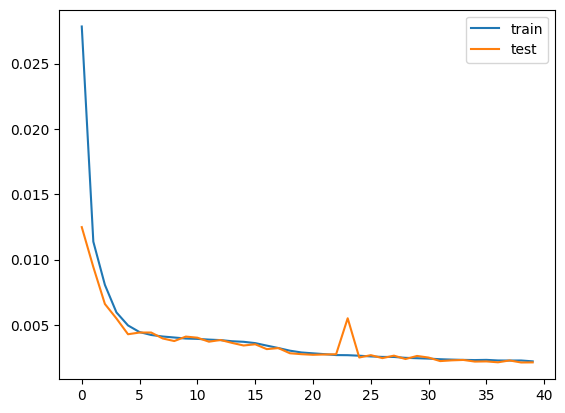

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


In [ ]:
# Save both encoder and decoder models
autoencoder.save("/content/drive/MyDrive/epro_project_data/trained_autoencoder/autoencoder_model.h5")
encoder.save("/content/drive/MyDrive/epro_project_data/trained_autoencoder/encoder_model.h5")
decoder.save("/content/drive/MyDrive/epro_project_data/trained_autoencoder/decoder_model.h5")


In [ ]:
loaded_autoencoder = tf.keras.models.load_model("/content/drive/MyDrive/epro_project_data/trained_autoencoder/autoencoder_model.h5")


In [ ]:
loaded_encoder = tf.keras.models.load_model("/content/drive/MyDrive/epro_project_data/trained_autoencoder/encoder_model.h5")


In [ ]:
reduced_df_test = pd.DataFrame(loaded_encoder.predict(X_test))

67/67 [==============================] - 0s 2ms/step


In [ ]:
reduced_df_test

,0,1,2,3
0,1.861818,6.640655,7.420955,5.976767
1,7.468415,3.308780,9.781346,5.802804
2,2.092448,7.145752,7.034283,6.382668
3,1.463611,0.862382,17.293007,0.000000
4,5.302466,7.553807,3.205259,7.365965
...,...,...,...,...
2128,1.347739,6.546103,6.883073,5.439122
2129,2.446295,0.192859,3.922896,0.276406
2130,5.612240,7.707331,4.062964,7.808489
2131,1.338764,1.278081,19.072725,0.000000


Finetune the autoencoder per participant

Tried this approach but it did not yield good results and as a result decided not to proceeed further with this approach.

In [ ]:
# import os
# import pandas as pd
# import tensorflow as tf
# from keras.layers.core import Dense
# from tensorflow.keras import Sequential, Model, optimizers
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.utils import resample

# # Step 1: Define the directory paths
# client_directory = '/content/drive/MyDrive/epro_project_data/client/raw_data/'
# scaler_directory = '/content/drive/MyDrive/epro_project_data/client/scalers'
# autoencoder_directory = '/content/drive/MyDrive/epro_project_data/client/autoencoders'
# loaded_autoencoder = tf.keras.models.load_model("/content/drive/MyDrive/epro_project_data/trained_autoencoder/autoencoder_model.h5")

# # Step 2: Initialize an empty list to store the processed DataFrames
# processed_dfs = []
# reduced_feature_dfs = []  # List to store reduced_feature_df for each participant

# # Step 3: Get a list of CSV files in the directory
# csv_files = [file for file in os.listdir(client_directory) if file.endswith('.csv')]

# # Step 4: Loop through each CSV file and process the data
# for file in csv_files:
#     file_path = os.path.join(client_directory, file)
#     df = pd.read_csv(file_path)

#     # Step 5: Apply one-hot encoding to the specified categorical columns
#     # Replace 'categorical_column1', 'categorical_column2', ... with the actual column names
#     categorical_columns = ['surveyId', 'timeBasedNotificationId', 'timeBasedSurveyQuestionId', 'title', 'deviceType']
#     df_encoded = pd.get_dummies(df, columns=categorical_columns)

#     scaler = MinMaxScaler()
#     columns_to_drop=['researchParticipantId', 'class']
#     df_to_scale = df_encoded.drop(columns=columns_to_drop)


#     # Step 6: Initialize the autoencoder architecture for feature reduction
#     autoencoder = loaded_autoencoder
#     history = autoencoder.fit(
#         participant_data,  # Participant data for training
#         participant_data,  # Same data as the target for autoencoder (reconstruction task)
#         epochs=10,          # Fine-tuning epochs (you can adjust this value)
#         batch_size=1      # Fine-tuning batch size (you can adjust this value)
#     )

#     # Step 11: Convert the reduced features back to a DataFrame
#     reduced_features_df = pd.DataFrame(reduced_features, columns=[f'feature_{i+1}' for i in range(16)])

#     # Step 12: Add back the dropped columns to the reduced features DataFrame
#     for column in columns_to_drop:
#         reduced_features_df[column] = df_encoded[column]

#     # Step 13: Append the processed DataFrame to the list
#     processed_dfs.append(df_encoded)
#     reduced_feature_dfs.append(reduced_features_df)

#     participant_id = file.split('_')[1]

#     # Step 14: Save the scaler for the current participant ID
#     scaler_filename = os.path.join(scaler_directory, f'{participant_id}_scaler.pkl')
#     joblib.dump(scaler, scaler_filename)
#     # Save the fine-tuned model for this participant
#     participant_model_filename = f"participant_{i}_model.h5"
#     autoencoder.save(participant_model_filename)

#     # Step 15: Save the autoencoder model for the current participant ID
#     autoencoder_filename = os.path.join(autoencoder_directory, f'{participant_id}_autoencoder.h5')
#     autoencoder.save(autoencoder_filename)

# # The 'processed_dfs' list now contains the processed DataFrames with one-hot encoding applied to the specified categorical columns
# # and the 'reduced_feature_dfs' list contains the DataFrames with reduced features for each participant.



NameError: ignored

In [ ]:
import os
import pandas as pd
import tensorflow as tf
from keras.layers.core import Dense
from tensorflow.keras import Sequential, Model, optimizers
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.utils import resample

# Step 1: Define the directory paths
client_directory = '/content/drive/MyDrive/epro_project_data/client/preprocessed_data/'
#scaler_directory = '/content/drive/MyDrive/epro_project_data/client/scalers'
autoencoder_directory = '/content/drive/MyDrive/epro_project_data/client/autoencoders'
loaded_autoencoder = tf.keras.models.load_model("/content/drive/MyDrive/epro_project_data/trained_autoencoder/autoencoder_model.h5")
encoded_data_directory='/content/drive/MyDrive/epro_project_data/client/encoded_data'
# Step 2: Initialize an empty list to store the processed DataFrames
processed_dfs = []
reduced_feature_dfs = []  # List to store reduced_feature_df for each participant

# Step 3: Get a list of CSV files in the directory
csv_files = [file for file in os.listdir(client_directory) if file.endswith('.csv')]

# Step 4: Loop through each CSV file and process the data
for file in csv_files:
    file_path = os.path.join(client_directory, file)
    df = pd.read_csv(file_path)

    # Step 5: Apply LabelEncoder to the specified categorical columns
    # Replace 'categorical_column1', 'categorical_column2', ... with the actual column names
    # categorical_columns = ['surveyId', 'timeBasedNotificationId', 'timeBasedSurveyQuestionId', 'title', 'deviceType']
    # label_encoder = LabelEncoder()
    # for col in categorical_columns:
    #     df[col] = label_encoder.fit_transform(df[col])

    # # Step 6: Apply MinMaxScaler on the specified columns only
    # minmax_scaler = MinMaxScaler()
    columns_to_drop=['researchParticipantId', 'class']
    df_to_scale = df.drop(columns=columns_to_drop)
    #df[df_to_scale.columns] = minmax_scaler.fit_transform(df_to_scale)

    # Step 7: Initialize the autoencoder architecture for feature reduction
    autoencoder = loaded_autoencoder
    # Step 8: Use the trained autoencoder to reduce the features
    encoder = autoencoder.layers[1]  # Get the encoder part from the layers
    reduced_features = encoder.predict(df_to_scale)

    # Step 9: Convert the reduced features back to a DataFrame
    reduced_features_df = pd.DataFrame(reduced_features, columns=[f'feature_{i+1}' for i in range(10)])

    # Step 10: Add back the dropped columns to the reduced features DataFrame
    for column in columns_to_drop:
        reduced_features_df[column] = df[column]

    # Step 11: Append the processed DataFrame to the list
    processed_dfs.append(df)
    reduced_feature_dfs.append(reduced_features_df)
    participant_id = file.split('_')[1]
    file_name = f'{encoded_data_directory}/participant_{participant_id}_train_encoded_data.csv'
    reduced_features_df.to_csv(file_name, index=False)
    # Step 12: Save the scaler for the current participant ID
    #scaler_filename = os.path.join(scaler_directory, f'{participant_id}_scaler.pkl')
    #joblib.dump(minmax_scaler, scaler_filename)

2/2 [==============================] - 0s 6ms/step


In [ ]:
import os
import pandas as pd
import tensorflow as tf
from keras.layers.core import Dense
from tensorflow.keras import Sequential, Model, optimizers
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.utils import resample

# Step 1: Define the directory paths
client_directory = '/content/drive/MyDrive/epro_project_data/client/raw_data/'
scaler_directory = '/content/drive/MyDrive/epro_project_data/client/scalers'
autoencoder_directory = '/content/drive/MyDrive/epro_project_data/client/autoencoders'
loaded_autoencoder = tf.keras.models.load_model("/content/drive/MyDrive/epro_project_data/trained_autoencoder/autoencoder_model.h5")
encoded_data_directory='/content/drive/MyDrive/epro_project_data/client/encoded_data'
# Step 2: Initialize an empty list to store the processed DataFrames
processed_dfs = []
reduced_feature_dfs = []  # List to store reduced_feature_df for each participant

# Step 3: Get a list of CSV files in the directory
csv_files = [file for file in os.listdir(client_directory) if file.endswith('.csv')]

# Step 4: Loop through each CSV file and process the data
for file in csv_files:
    file_path = os.path.join(client_directory, file)
    df = pd.read_csv(file_path)

    # Step 5: Apply LabelEncoder to the specified categorical columns
    # Replace 'categorical_column1', 'categorical_column2', ... with the actual column names
    categorical_columns = ['surveyId', 'timeBasedNotificationId', 'timeBasedSurveyQuestionId', 'title', 'deviceType']
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col])

    # Step 6: Apply MinMaxScaler on the specified columns only
    minmax_scaler = MinMaxScaler()
    columns_to_drop=['researchParticipantId', 'class']
    df_to_scale = df.drop(columns=columns_to_drop)
    df[df_to_scale.columns] = minmax_scaler.fit_transform(df_to_scale)

    # Step 7: Initialize the autoencoder architecture for feature reduction
    autoencoder = loaded_autoencoder


    # Step 8: Use the trained autoencoder to reduce the features
    encoder = autoencoder.layers[1]  # Get the encoder part from the layers
    reduced_features = encoder.predict(df_to_scale)

    # Step 9: Convert the reduced features back to a DataFrame
    reduced_features_df = pd.DataFrame(reduced_features, columns=[f'feature_{i+1}' for i in range(4)])

    # Step 10: Add back the dropped columns to the reduced features DataFrame
    for column in columns_to_drop:
        reduced_features_df[column] = df[column]

    # Step 11: Append the processed DataFrame to the list
    processed_dfs.append(df)
    reduced_feature_dfs.append(reduced_features_df)
    file_name = f'{encoded_data_directory}/participant_{participant_id}_train_data.csv'
    reduced_features_df.to_csv(file_name, index=False)

    participant_id = file.split('_')[1]

    # Step 12: Save the scaler for the current participant ID
    scaler_filename = os.path.join(scaler_directory, f'{participant_id}_scaler.pkl')
    joblib.dump(minmax_scaler, scaler_filename)




1/1 [==============================] - 0s 31ms/step


In [ ]:
reduced_feature_dfs[0]

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,researchParticipantId,class
0,11.152654,0.0,5.405278,11.262625,0.000000,1.267781,8.193662,4.595623,5.063551,4.458842,621e31e76d80aa5e27a0492f,1
1,5.260788,0.0,2.652986,3.265573,0.000000,3.969543,3.713743,3.336449,5.458471,2.424633,621e31e76d80aa5e27a0492f,1
2,7.214140,0.0,4.177016,8.882647,1.069588,0.713803,3.983514,3.386672,7.173686,3.905747,621e31e76d80aa5e27a0492f,1
3,3.334523,0.0,3.777371,3.028777,0.000000,4.210826,2.707540,4.335342,4.498052,1.242036,621e31e76d80aa5e27a0492f,1
4,10.040165,0.0,0.742469,3.618618,0.000000,4.998908,6.790656,1.925584,6.546919,3.703882,621e31e76d80aa5e27a0492f,1
5,4.403818,0.0,2.954349,4.742278,1.464810,2.820238,3.302345,3.121279,5.443264,2.617308,621e31e76d80aa5e27a0492f,1
6,4.181635,0.0,2.560129,1.906961,0.000000,4.774460,3.445547,3.492653,4.835362,1.873353,621e31e76d80aa5e27a0492f,1
7,6.142724,0.0,2.755368,4.311033,0.000000,3.525438,3.817805,3.338794,6.002966,2.927179,621e31e76d80aa5e27a0492f,1
8,7.183915,0.0,6.597501,8.637453,0.000000,4.532362,7.272237,7.292759,2.465250,2.283152,621e31e76d80aa5e27a0492f,0
9,4.599710,0.0,3.628476,5.084743,1.432309,3.257179,2.980147,4.020179,5.606350,2.433641,621e31e76d80aa5e27a0492f,1


Repeating the process for server directory

In [ ]:
import os
import pandas as pd
import tensorflow as tf
from keras.layers.core import Dense
from tensorflow.keras import Sequential, Model, optimizers
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.utils import resample

# Step 1: Define the directory paths
server_directory = '/content/drive/MyDrive/epro_project_data/server/raw_data/'
scaler_directory = '/content/drive/MyDrive/epro_project_data/server/scalers'
autoencoder_directory = '/content/drive/MyDrive/epro_project_data/server/autoencoders'
loaded_autoencoder = tf.keras.models.load_model("/content/drive/MyDrive/epro_project_data/trained_autoencoder/autoencoder_model.h5")
encoded_data_directory='/content/drive/MyDrive/epro_project_data/server/encoded_data'
# Step 2: Initialize an empty list to store the processed DataFrames
processed_dfs = []
reduced_feature_dfs = []  # List to store reduced_feature_df for each participant

# Step 3: Get a list of CSV files in the directory
csv_files = [file for file in os.listdir(server_directory) if file.endswith('.csv')]

# Step 4: Loop through each CSV file and process the data
for file in csv_files:
    file_path = os.path.join(server_directory, file)
    df = pd.read_csv(file_path)

    # Step 5: Apply LabelEncoder to the specified categorical columns
    # Replace 'categorical_column1', 'categorical_column2', ... with the actual column names
    categorical_columns = ['surveyId',
      'timeBasedNotificationId',
      'timeBasedSurveyQuestionId',
       'mobileModelName',
        'mobileOperatingSystemVersion',
        'title',
        'deviceType']
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col])

    # Step 6: Apply MinMaxScaler on the specified columns only
    minmax_scaler = MinMaxScaler()
    columns_to_drop=['researchParticipantId', 'class']
    df_to_scale = df.drop(columns=columns_to_drop)
    df[df_to_scale.columns] = minmax_scaler.fit_transform(df_to_scale)

    # Step 7: Initialize the autoencoder architecture for feature reduction
    autoencoder = loaded_autoencoder
    #

    # # Step 9: Fine-tune the autoencoder by training the decoder and additional classification layers
    # learning_rate = 0.001  # You can adjust this value based on your needs
    # optimizer = optimizers.Adam(learning_rate=learning_rate)
    # autoencoder.compile(optimizer=optimizer, loss='mse')

    # history = autoencoder.fit(
    #     df_to_scale,         # Participant data for training
    #     df_to_scale,         # Same data as the target for autoencoder (reconstruction task)
    #     epochs=10,           # Fine-tuning epochs (you can adjust this value)
    #     batch_size=16,        # Fine-tuning batch size (you can adjust this value)
    #     verbose=1            # Set to 1 to see the training progress
    # )

    # Step 8: Use the trained autoencoder to reduce the features
    encoder = autoencoder.layers[1]  # Get the encoder part from the layers
    reduced_features = encoder.predict(df_to_scale)

    # Step 9: Convert the reduced features back to a DataFrame
    reduced_features_df = pd.DataFrame(reduced_features, columns=[f'feature_{i+1}' for i in range(10)])

    # Step 10: Add back the dropped columns to the reduced features DataFrame
    for column in columns_to_drop:
        reduced_features_df[column] = df[column]

    # Step 11: Append the processed DataFrame to the list
    processed_dfs.append(df)
    participant_id = file.split('_')[1]
    reduced_feature_dfs.append(reduced_features_df)
    file_name = f'{encoded_data_directory}/participant_{participant_id}_train_data.csv'
    reduced_features_df.to_csv(file_name, index=False)



    # Step 12: Save the scaler for the current participant ID
    scaler_filename = os.path.join(scaler_directory, f'{participant_id}_scaler.pkl')
    joblib.dump(minmax_scaler, scaler_filename)

    # Save the fine-tuned model for this participant
    #participant_model_filename = f"participant_{i}_model.h5"
   # autoencoder.save(participant_model_filename)

    # Step 13: Save the autoencoder model for the current participant ID
    # autoencoder_filename = os.path.join(autoencoder_directory, f'{participant_id}_autoencoder.h5')
    # autoencoder.save(autoencoder_filename)

# The 'processed_dfs' list now contains the processed DataFrames with LabelEncoder applied to the specified categorical columns
# and the 'reduced_feature_dfs' list contains the DataFrames with reduced features for each participant.


1/1 [==============================] - 0s 39ms/step


In [ ]:
import os
import pandas as pd
import tensorflow as tf
from keras.layers.core import Dense
from tensorflow.keras import Sequential, Model, optimizers
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.utils import resample
import joblib

# Step 1: Define the directory paths
server_directory = '/content/drive/MyDrive/epro_project_data/server/raw_data/'
scaler_directory = '/content/drive/MyDrive/epro_project_data/client/scalers'
label_encoder_directory='/content/drive/MyDrive/epro_project_data/client/label_encoders'
autoencoder_directory = '/content/drive/MyDrive/epro_project_data/server/autoencoders'
loaded_autoencoder = tf.keras.models.load_model("/content/drive/MyDrive/epro_project_data/trained_autoencoder/autoencoder_model.h5")
encoded_data_directory='/content/drive/MyDrive/epro_project_data/server/encoded_data'
# Step 2: Initialize an empty list to store the processed DataFrames
processed_dfs = []
reduced_feature_dfs = []  # List to store reduced_feature_df for each participant

# Step 3: Get a list of CSV files in the directory
csv_files = [file for file in os.listdir(server_directory) if file.endswith('.csv')]

# Step 4: Loop through each CSV file and process the data
for file in csv_files:
    file_path = os.path.join(server_directory, file)
    df = pd.read_csv(file_path)

    # Step 5: Apply LabelEncoder to the specified categorical columns
    # Replace 'categorical_column1', 'categorical_column2', ... with the actual column names
    participant_id = file.split('_')[1]

    # Load the label encoder for the current participant ID
    try:
      label_encoder_filename = os.path.join(label_encoder_directory, f'{participant_id}_label_encoder.pkl')
      label_encoder = joblib.load(label_encoder_filename)
    except FileNotFoundError:
        print(f"Label encoder not found for participant {participant_id}. Skipping transformation.")

    categorical_columns = ['surveyId',
      'timeBasedNotificationId',
      'timeBasedSurveyQuestionId',
       'mobileModelName',
        'mobileOperatingSystemVersion',
        'title',
        'deviceType']
    for col in categorical_columns:
        print(col)
        df[col] = label_encoder.fit_transform(df[col])

    # Step 6: Apply MinMaxScaler on the specified columns only
    minmax_scaler = MinMaxScaler()
    columns_to_drop=['researchParticipantId', 'class']
    df_to_scale = df.drop(columns=columns_to_drop)

    # Load the scaler for the current participant ID
    scaler_filename = os.path.join(scaler_directory, f'{participant_id}_scaler.pkl')
    minmax_scaler = joblib.load(scaler_filename)

    df[df_to_scale.columns] = minmax_scaler.transform(df_to_scale)

    # Step 7: Initialize the autoencoder architecture for feature reduction
    autoencoder = loaded_autoencoder
    #

    # Step 8: Use the trained autoencoder to reduce the features
    encoder = autoencoder.layers[1]  # Get the encoder part from the layers
    reduced_features = encoder.predict(df_to_scale)

    # Step 9: Convert the reduced features back to a DataFrame
    reduced_features_df = pd.DataFrame(reduced_features, columns=[f'feature_{i+1}' for i in range(10)])

    # Step 10: Add back the dropped columns to the reduced features DataFrame
    for column in columns_to_drop:
        reduced_features_df[column] = df[column]

    # Step 11: Append the processed DataFrame to the list
    processed_dfs.append(df)
    reduced_feature_dfs.append(reduced_features_df)
    file_name = f'{encoded_data_directory}/participant_{participant_id}_train_data.csv'
    reduced_features_df.to_csv(file_name, index=False)

    # Step 12: Save the scaler for the current participant ID (Optional)
    # scaler_filename = os.path.join(scaler_directory, f'{participant_id}_scaler.pkl')
    # joblib.dump(minmax_scaler, scaler_filename)

    # Save the fine-tuned model for this participant (Optional)
    # participant_model_filename = f"participant_{i}_model.h5"
    # autoencoder.save(participant_model_filename)

    # Step 13: Save the autoencoder model for the current participant ID (Optional)
    # autoencoder_filename = os.path.join(autoencoder_directory, f'{participant_id}_autoencoder.h5')
    # autoencoder.save(autoencoder_filename)

# The 'processed_dfs' list now contains the processed DataFrames with LabelEncoder applied to the specified categorical columns
# and the 'reduced_feature_dfs' list contains the DataFrames with reduced features for each participant.


surveyId
timeBasedNotificationId
timeBasedSurveyQuestionId
mobileModelName
mobileOperatingSystemVersion
title
deviceType
1/1 [==============================] - 0s 218ms/step
surveyId
timeBasedNotificationId
timeBasedSurveyQuestionId
mobileModelName
mobileOperatingSystemVersion
title
deviceType
1/1 [==============================] - 0s 32ms/step
surveyId
timeBasedNotificationId
timeBasedSurveyQuestionId
mobileModelName
mobileOperatingSystemVersion
title
deviceType
1/1 [==============================] - 0s 27ms/step
surveyId
timeBasedNotificationId
timeBasedSurveyQuestionId
mobileModelName
mobileOperatingSystemVersion
title
deviceType
1/1 [==============================] - 0s 36ms/step
surveyId
timeBasedNotificationId
timeBasedSurveyQuestionId
mobileModelName
mobileOperatingSystemVersion
title
deviceType
1/1 [==============================] - 0s 32ms/step
surveyId
timeBasedNotificationId
timeBasedSurveyQuestionId
mobileModelName
mobileOperatingSystemVersion
title
deviceType
1/1 [========